In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

def circle_generator(nframes, key, addConst, radius=1.0):
    ts = jnp.linspace(0, 1, nframes, endpoint=False)
    constant_value = jax.random.uniform(key, ())
    x = radius * jnp.cos(ts * 2 * jnp.pi)
    y = radius * jnp.sin(ts * 2 * jnp.pi)
    if addConst:
        circle = jnp.stack([x, y, constant_value * jnp.ones(nframes)], axis=-1)
    else:
        circle = jnp.stack([x, y], axis=-1)
    return circle

def multi_slice_circle_generator(nframes, num_slices, key, addConst, radius=1.0, z_min=-1.0, z_max=1.0):
    ts = jnp.linspace(0, 1, nframes, endpoint=False)
    ss = jnp.linspace(z_min, z_max, num_slices, endpoint=True)
    constant_value = jax.random.uniform(key, ())
    arrays_to_stack = []
    x = radius * jnp.cos(ts * 2 * jnp.pi)
    y = radius * jnp.sin(ts * 2 * jnp.pi)
    for s in ss:
        if addConst:
            circle_s = jnp.stack([x, y, s * jnp.ones(nframes), constant_value * jnp.ones(nframes)], axis=-1)
        else:
            circle_s = jnp.stack([x, y, s * jnp.ones(nframes)], axis=-1)
        arrays_to_stack.append(circle_s)
    stacked_array = jnp.stack(arrays_to_stack, axis=0)
    return stacked_array

2025-07-18 13:34:40.566520: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.20). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


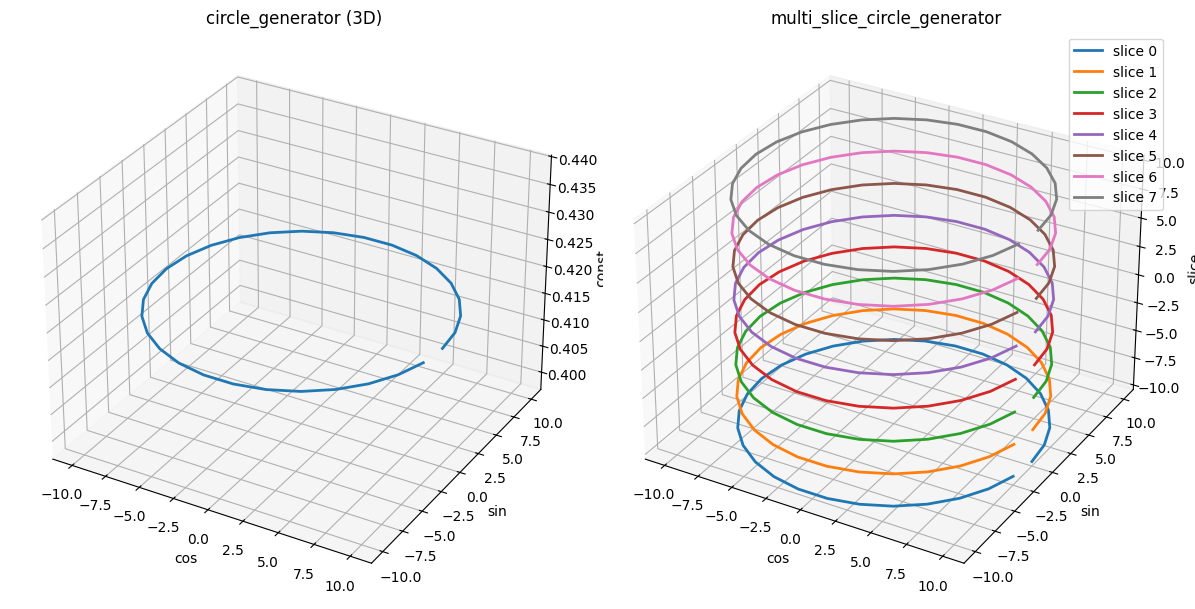

In [2]:
key = jax.random.PRNGKey(0)
nframes = 30
num_slices = 8

circle = circle_generator(nframes, key, addConst=True, radius=10.0)
multi_circle = multi_slice_circle_generator(nframes, num_slices, key, addConst=True,radius=10.0, z_min=-10.0, z_max=10.0)

fig = plt.figure(figsize=(12, 6))

# Plot single circle (3D or 2D)
if circle.shape[1] == 3:
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot(circle[:, 0], circle[:, 1], circle[:, 2], lw=2)
    ax1.set_title('circle_generator (3D)')
    ax1.set_xlabel('cos')
    ax1.set_ylabel('sin')
    ax1.set_zlabel('const')
else:
    ax1 = fig.add_subplot(121)
    ax1.plot(circle[:, 0], circle[:, 1], lw=2)
    ax1.set_title('circle_generator (2D)')
    ax1.set_xlabel('cos')
    ax1.set_ylabel('sin')
    ax1.axis('equal')

# Plot multi-slice circles (always 3D)
ax2 = fig.add_subplot(122, projection='3d')
for i in range(num_slices):
    ax2.plot(multi_circle[i, :, 0], multi_circle[i, :, 1], multi_circle[i, :, 2], lw=2, label=f'slice {i}')
ax2.set_title('multi_slice_circle_generator')
ax2.set_xlabel('cos')
ax2.set_ylabel('sin')
ax2.set_zlabel('slice')
ax2.legend()

plt.tight_layout()
plt.show()